<a href="https://colab.research.google.com/github/abdulwasaeee/Random-Forest/blob/main/RandomForestClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [127]:
df=pd.read_csv('Travel.csv')
df.shape

(4888, 20)

In [128]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [129]:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


In [130]:
#feature engineering
df.Gender.value_counts()

,count
Gender,
Male,2916
Female,1817
Fe Male,155


In [131]:
df.Gender.replace({"Fe Male": "Female"},inplace=True)
df.Gender.value_counts()

,count
Gender,
Male,2916
Female,1972


In [132]:
df.MaritalStatus.value_counts()

,count
MaritalStatus,
Married,2340
Divorced,950
Single,916
Unmarried,682


In [133]:
df.MaritalStatus= df.MaritalStatus.replace('Unmarried','Single')
df.MaritalStatus.value_counts()

,count
MaritalStatus,
Married,2340
Single,1598
Divorced,950


In [134]:
#finding values with na
ftna=[f for f in df.columns if df[f].isnull().sum()>=1]
for f in ftna:
  print(f,np.round(df[f].isnull().mean()*100,5))

Age 4.62357
TypeofContact 0.51146
DurationOfPitch 5.13502
NumberOfFollowups 0.92062
PreferredPropertyStar 0.53191
NumberOfTrips 2.86416
NumberOfChildrenVisiting 1.35025
MonthlyIncome 4.76678


In [135]:
df[ftna].describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [136]:
df.Age.mode()[0]

np.float64(35.0)

In [137]:
df.Age.fillna(df.Age.median(),inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True) # Corrected fillna for TypeofContact
df.DurationOfPitch.fillna(df.Age.median(),inplace=True)
df.NumberOfFollowups.fillna(df.Age.mode()[0],inplace=True)
df.PreferredPropertyStar.fillna(df.Age.mode()[0],inplace=True)
df.NumberOfTrips.fillna(df.Age.median(),inplace=True)
df.NumberOfChildrenVisiting.fillna(df.Age.mode()[0],inplace=True)
df.MonthlyIncome.fillna(df.Age.median(),inplace=True)

In [138]:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0


In [139]:
df.drop('CustomerID',inplace=True,axis=1)

In [140]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [141]:
df['TotalVisiting']=df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.TotalVisiting.head()

,TotalVisiting
0,3.0
1,5.0
2,3.0
3,3.0
4,2.0


In [142]:
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],inplace=True)

In [143]:
x = df.drop('ProdTaken', axis=1)
y=df['ProdTaken']

In [144]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [145]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42
)

In [146]:
#creating column transformer

catfts=x.select_dtypes(include='object').columns
numfts=x.select_dtypes(exclude='object').columns


In [147]:
ohe=OneHotEncoder(drop='first')
scaler=StandardScaler()

preprocessor=ColumnTransformer([
    ("OneHotEncoder",ohe, catfts),
    ("StandardScaler",scaler,numfts)
])

x_train=preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test) # Also transform the test set

In [148]:
models={
    "random forest": RandomForestClassifier(),
    "decision tree": DecisionTreeClassifier(),
    "logistic regression": LogisticRegression()
}

In [149]:
for key, value in models.items():
  model=value
  model.fit(x_train,y_train)

  y_pred=model.predict(x_test)
  y_pred2=model.predict(x_train)

  accuracy=accuracy_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  recall=recall_score(y_test,y_pred)
  roc_auc=roc_auc_score(y_test,y_pred)

  accuracy2=accuracy_score(y_train,y_pred2)
  f12=f1_score(y_train,y_pred2)
  precision2=precision_score(y_train,y_pred2)
  recall2=recall_score(y_train,y_pred2)
  roc_auc2=roc_auc_score(y_train,y_pred2)

  print("*****"+key+'*****')
  print("metrics for train data:")
  print("accuracy: " + str(accuracy2))
  print("f1: " + str(f12))
  print("precision: " + str(precision2))
  print("recall: " + str(recall2))
  print("roc_auc: " + str(roc_auc2))
  print("")
  print("metrics for test data:")
  print("accuracy: " + str(accuracy))
  print("f1: " + str(f1))
  print("precision: " + str(precision))
  print("recall: " + str(recall))
  print("roc_auc: " + str(roc_auc))
  print("")

*****random forest*****
metrics for train data:
accuracy: 1.0
f1: 1.0
precision: 1.0
recall: 1.0
roc_auc: 1.0

metrics for test data:
accuracy: 0.9247135842880524
f1: 0.75
precision: 0.9517241379310345
recall: 0.6188340807174888
roc_auc: 0.8059135368552409

*****decision tree*****
metrics for train data:
accuracy: 1.0
f1: 1.0
precision: 1.0
recall: 1.0
roc_auc: 1.0

metrics for test data:
accuracy: 0.9230769230769231
f1: 0.7911111111111111
precision: 0.7841409691629956
recall: 0.7982062780269058
roc_auc: 0.8745786144889284

*****logistic regression*****
metrics for train data:
accuracy: 0.8390616475722859
f1: 0.40162271805273836
precision: 0.6851211072664359
recall: 0.28407460545193686
roc_auc: 0.6267122774649379

metrics for test data:
accuracy: 0.8404255319148937
f1: 0.4108761329305136
precision: 0.6296296296296297
recall: 0.30493273542600896
roc_auc: 0.6324463476929845



In [150]:
params={
    "max_features":[2,3,5,8,10],
    "max_depth":["auto",2,5,8,10],
    "n_estimators":[100,200,500]
}

In [151]:
rcv=RandomizedSearchCV(RandomForestClassifier(),param_distributions=params,n_iter=100,cv=3,verbose=0)
rcv.fit(x_train,y_train)
rcv.best_params_

{'n_estimators': 100, 'max_features': 10, 'max_depth': 10}

In [160]:
rfc=RandomForestClassifier(n_estimators=1000,max_depth=10,max_features=10)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features=10, n_estimators=1000)

In [170]:
y_prob=rfc.predict_proba(x_test)[:,1]

In [171]:
fpr, tpr, ts= roc_curve(y_test, y_prob)

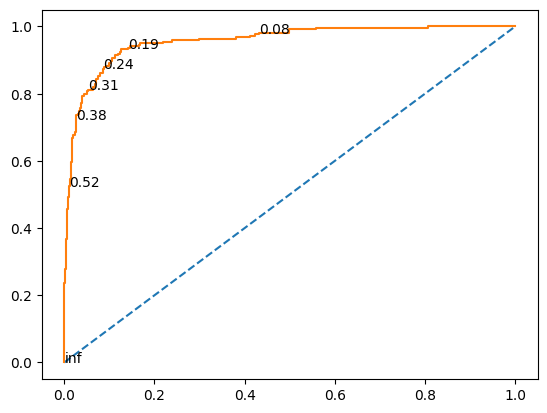

In [182]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr)
for i,t in enumerate(ts):
  if i%20==0:
    plt.annotate(f'{t:.2f}',(fpr[i],tpr[i]))